In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

#Fit and transform the data using the scaler:
scaled_data = scaler.fit_transform(df_market_data)



In [6]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)


# Copy the crypto names from the original DataFrame
scaled_df.reset_index(inplace=True)

# Set the coin_id column as index
scaled_df.rename(columns={'index': 'coin_id'}, inplace=True)


# Display the scaled DataFrame
print(scaled_df)

                 coin_id  price_change_percentage_24h  \
0                bitcoin                     0.508529   
1               ethereum                     0.185446   
2                 tether                     0.021774   
3                 ripple                    -0.040764   
4           bitcoin-cash                     1.193036   
5            binancecoin                     0.891871   
6              chainlink                     0.011397   
7                cardano                     0.102530   
8               litecoin                     0.077497   
9        bitcoin-cash-sv                     0.448952   
10      crypto-com-chain                     0.331280   
11              usd-coin                     0.034352   
12                   eos                     0.155710   
13                monero                     0.262723   
14                  tron                     0.130050   
15                 tezos                    -0.151583   
16                   okb       

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))  


In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:

# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=0)

# 2. Fit the model to the data using `df_market_data_scaled`
    numeric_data = scaled_df.drop(columns=['coin_id'])  


    k_model.fit(numeric_data)


# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)




/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/e

In [30]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,          # This is the list of k values (number of clusters)
    "inertia": inertia  # This is the list of inertia values calculated for each k
}


# Create a DataFrame with the data to plot the Elbow curve
df_OG_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_OG_elbow)

     k     inertia
0    1  256.874086
1    2  165.901994
2    3   93.774626
3    4   49.665497
4    5   37.878747
5    6   27.618972
6    7   21.182776
7    8   17.389823
8    9   13.593650
9   10   10.559358
10  11    8.007418


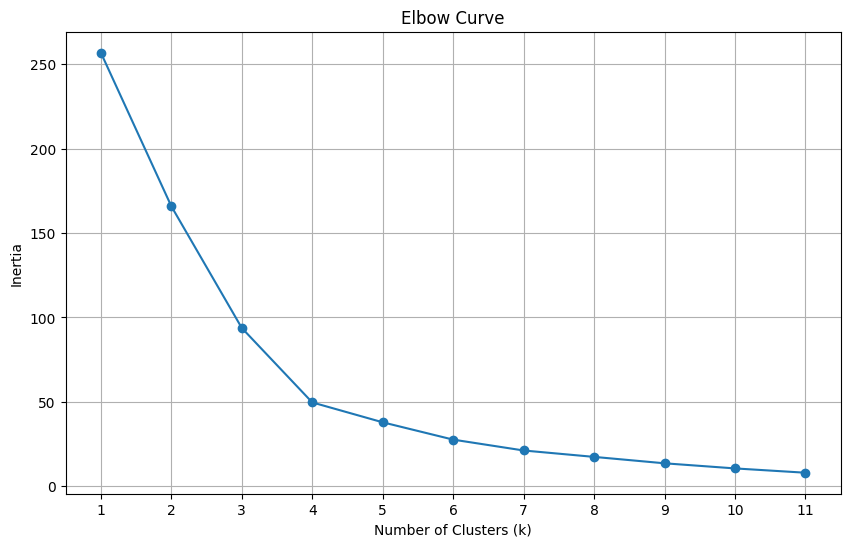

In [31]:
import matplotlib.pyplot as plt


# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])  # Set x-ticks to be the k values
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
4 as that is where the elbow bends

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [32]:
# Initialize the K-Means model using the best value for k
best_k = 4

k_model_best = KMeans(n_clusters=best_k, random_state=72)


In [33]:
# Fit the K-Means model using the scaled DataFrame
k_model_best.fit(numeric_data)

print(k_model_best)


KMeans(n_clusters=4, random_state=72)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = k_model_best.predict(numeric_data)


# Print the resulting array of cluster values.
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


In [14]:
# Create a copy of the scaled DataFrame
numeric_data_copy = numeric_data.copy()


In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
numeric_data_copy['Predicted_Cluster'] = predicted_clusters


# Display the copy of the scaled DataFrame
print(numeric_data_copy)


    price_change_percentage_24h  price_change_percentage_7d  \
0                      0.508529                    0.493193   
1                      0.185446                    0.934445   
2                      0.021774                   -0.706337   
3                     -0.040764                   -0.810928   
4                      1.193036                    2.000959   
5                      0.891871                    1.327295   
6                      0.011397                    2.572251   
7                      0.102530                    1.508001   
8                      0.077497                    0.334297   
9                      0.448952                   -0.190684   
10                     0.331280                   -1.614844   
11                     0.034352                   -0.733026   
12                     0.155710                   -0.922491   
13                     0.262723                    1.792602   
14                     0.130050                   -0.04

In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = numeric_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Predicted_Cluster",  # Color points by predicted clusters
    hover_cols=['Crypto_Name']  # Include the crypto name in hover information
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Predicted_Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

print(pca_model)


PCA(n_components=3)


In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca_model.fit_transform(numeric_data)

pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(3)], index=scaled_df.index)

# View the scaled PCA data
print(pca_df)


         PC1       PC2       PC3
0  -0.600667  0.842760  0.461595
1  -0.458261  0.458466  0.952877
2  -0.433070 -0.168126 -0.641752
3  -0.471835 -0.222660 -0.479053
4  -1.157800  2.041209  1.859715
5  -0.516534  1.388377  0.804071
6  -0.450711  0.517699  2.846143
7  -0.345600  0.729439  1.478013
8  -0.649468  0.432165  0.600303
9  -0.759014 -0.201200 -0.217653
10 -0.248198 -1.376252 -1.462026
11 -0.438408 -0.175337 -0.663388
12 -0.693425 -0.473815 -0.527597
13  0.060499  2.909404  1.498571
14 -0.393352 -0.108192 -0.012756
15 -0.796176 -0.494409  1.082812
16  0.064075 -1.269825 -1.098829
17 -0.489015 -0.732719 -0.062543
18 -0.306272  0.703415  1.714224
19 -0.513528 -0.142802 -0.656566
20 -0.362120 -0.986914 -0.728752
21 -0.604265  0.827398  0.439316
22 -0.413296 -0.674115 -1.076628
23 -0.407483 -0.212507 -0.351426
24  0.608974  0.563532 -1.148742
25 -0.450211 -0.151019 -0.647401
26 -0.764665 -0.517886  0.204990
27 -0.556315 -1.938209 -1.261776
28 -0.425147  0.492976  1.058048
29  2.6768

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

print("Explained Variance Ratio for each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

Explained Variance Ratio for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
otal Explained Variance of the three principal components: 0.8950 ( the summ of the 3 EVOs)

In [20]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(3)], index=scaled_df.index)


# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = scaled_df['coin_id']  # Adjust if necessary


# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)


# Display the scaled PCA DataFrame
print(pca_df)


                           PC1       PC2       PC3
coin_id                                           
bitcoin              -0.600667  0.842760  0.461595
ethereum             -0.458261  0.458466  0.952877
tether               -0.433070 -0.168126 -0.641752
ripple               -0.471835 -0.222660 -0.479053
bitcoin-cash         -1.157800  2.041209  1.859715
binancecoin          -0.516534  1.388377  0.804071
chainlink            -0.450711  0.517699  2.846143
cardano              -0.345600  0.729439  1.478013
litecoin             -0.649468  0.432165  0.600303
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653
crypto-com-chain     -0.248198 -1.376252 -1.462026
usd-coin             -0.438408 -0.175337 -0.663388
eos                  -0.693425 -0.473815 -0.527597
monero                0.060499  2.909404  1.498571
tron                 -0.393352 -0.108192 -0.012756
tezos                -0.796176 -0.494409  1.082812
okb                   0.064075 -1.269825 -1.098829
stellar              -0.489015 

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))


In [22]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    # 1. Create a KMeans model using the loop counter for n_clusters
    k_model = KMeans(n_clusters=i, random_state=0)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    k_model.fit(pca_df)  # Ensure df_market_data_pca contains only numeric data
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

# Display the inertia values
print(inertia)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/e

[256.8740855678926, 165.9019940203601, 93.77462568057297, 49.66549665179738, 37.87874703346251, 27.618971787957445, 21.182775862957335, 17.3898232047689, 13.593650379876738, 10.55935756279343, 8.007418066730596]


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/e

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,           # List of k values (number of clusters)
    "inertia": inertia  # List of inertia values calculated for each k
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve using hvPlot without the marker parameter
elbow_plot = df_elbow.hvplot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve', 
    xlabel='Number of Clusters (k)', 
    ylabel='Inertia'
)

# Display the plot
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  no, it is the same

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
# Initialize the K-Means model using the best value for k
best_k = 4 

k_model_best = KMeans(n_clusters=best_k, random_state=0)


In [26]:
# Fit the K-Means model using the PCA data
k_model_best.fit(pca_df)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predicted_clusters = k_model_best.predict(pca_df)


# Print the resulting array of cluster values.
print(predicted_clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [28]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_copy['Predicted_Cluster'] = predicted_clusters


# Display the copy of the scaled PCA DataFrame
print(pca_df_copy)


                           PC1       PC2       PC3  Predicted_Cluster
coin_id                                                              
bitcoin              -0.600667  0.842760  0.461595                  0
ethereum             -0.458261  0.458466  0.952877                  0
tether               -0.433070 -0.168126 -0.641752                  3
ripple               -0.471835 -0.222660 -0.479053                  3
bitcoin-cash         -1.157800  2.041209  1.859715                  0
binancecoin          -0.516534  1.388377  0.804071                  0
chainlink            -0.450711  0.517699  2.846143                  0
cardano              -0.345600  0.729439  1.478013                  0
litecoin             -0.649468  0.432165  0.600303                  0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653                  3
crypto-com-chain     -0.248198 -1.376252 -1.462026                  3
usd-coin             -0.438408 -0.175337 -0.663388                  3
eos                 

In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Predicted_Cluster",  # Color points by predicted clusters
    hover_cols=['coin_id']   # Include the crypto name in hover information
)

# Display the scatter plot
scatter_plot


:NdOverlay   [Predicted_Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [37]:
# Composite plot to contrast the Elbow curves

# Create the Elbow curves for both datasets
elbow_curve_original = df_OG_elbow.hvplot.line(
    x='k', 
    y='inertia', 
    label='Original Data', 
    color='blue'
)

elbow_curve_pca = df_elbow.hvplot.line(
    x='k', 
    y='inertia', 
    label='PCA Data', 
    color='orange'
)

# Composite plot to contrast the Elbow curves
composite_plot = elbow_curve_original * elbow_curve_pca

# Display the composite plot
composite_plot.opts(title='Elbow Curve Comparison', xlabel='Number of Clusters (k)', ylabel='Inertia')

:Overlay
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)

In [39]:
# Composite plot to contrast the clusters
scatter_pca = pca_df_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Predicted_Cluster',  # Color points by predicted clusters
    hover_cols=['coin_id'],  # Include the crypto name in hover information
    title='Clusters in PCA Space',
    color='blue'
)

scatter_original = numeric_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',  # Adjust based on your original data
    y='price_change_percentage_7d',    # Adjust based on your original data
    by='Predicted_Cluster',  # Color points by predicted clusters
    hover_cols=['coin_id'],  # Include the crypto name in hover information
    title='Clusters in Original Space',
    color='orange'
)

# Composite plot to contrast the clusters
composite_cluster_plot = scatter_pca * scatter_original

# Display the composite plot
composite_cluster_plot.opts(title='Cluster Comparison: PCA vs Original Data', xlabel='X-axis', ylabel='Y-axis')

:Overlay
   .NdOverlay.I  :NdOverlay   [Predicted_Cluster]
      :Scatter   [PC1]   (PC2,coin_id)
   .NdOverlay.II :NdOverlay   [Predicted_Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

  Using fewer features to group data with K-Means can make the clusters easier to see and understand. It can also speed up the process and use less computer power. However, it’s important to be careful because cutting down on features might mean losing some important details about the data. You need to think carefully about which features to keep and how they help in forming the groups.